In [1]:
import pandas as pd
import datetime

# Funciones

In [2]:
def adding_missing_dates(df,country):
    df_index = df.set_index('Date')
    series = df_index[country+' casos']
    df_with_dates = series.asfreq('D',method='ffill').reset_index().reset_index()
    return df_with_dates

# Italia

In [19]:
wiki_italia = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Italy'

In [27]:
df_covid_19_italia = pd.read_html(wiki_italia)[4]

In [31]:
df_covid_19_italia = df_covid_19_italia.iloc[:-7, (
    (df_covid_19_italia.columns.get_level_values(1).isin(['Date','Total'])) &
    (df_covid_19_italia.columns.get_level_values(0).isin(['Date','Confirmed']))
)]

In [32]:
df_covid_19_italia.columns = df_covid_19_italia.columns.droplevel()

In [33]:
df_covid_19_italia = df_covid_19_italia.reset_index()

In [34]:
df_covid_19_italia.tail()

,index,Date,Total
20,20,2020-03-10,10149
21,21,2020-03-11,12462
22,22,2020-03-12,15113
23,23,2020-03-13,17660
24,24,2020-03-14,21157


In [35]:
df_covid_19_italia = df_covid_19_italia.rename(columns={'Total':'Italia casos'})

In [36]:
df_covid_19_italia['Date'] = pd.to_datetime(df_covid_19_italia['Date'])

In [37]:
df_covid_19_italia = adding_missing_dates(df_covid_19_italia, country='Italia')

In [38]:
df_covid_19_italia.head()

,index,Date,Italia casos
0,0,2020-01-31,2
1,1,2020-02-01,2
2,2,2020-02-02,2
3,3,2020-02-03,2
4,4,2020-02-04,2


# España

In [39]:
wiki_españa = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Spain'

In [40]:
df_covid_19_españa = pd.read_html(wiki_españa,header=1)[1]

In [41]:
df_covid_19_españa.columns

Index(['Date', 'Date.1', 'Unnamed: 2', '# of cases', '# of deaths'], dtype='object')

In [42]:
df_covid_19_españa = df_covid_19_españa[:-1].drop(columns=['Date.1', 'Unnamed: 2', '# of deaths'])

In [43]:
df_covid_19_españa['# of cases'] = df_covid_19_españa['# of cases'].str.replace('\(.*$','').str.strip().str.replace(',','')

In [44]:
df_covid_19_españa['# of cases'] = df_covid_19_españa['# of cases'].astype(int)

In [45]:
df_covid_19_españa = df_covid_19_españa[df_covid_19_españa['Date']!='⋮'].rename(columns={'# of cases':'España casos'})

In [46]:
df_covid_19_españa['Date'] = pd.to_datetime(df_covid_19_españa['Date'])

In [47]:
df_covid_19_españa.dtypes

Date            datetime64[ns]
España casos             int32
dtype: object

In [48]:
df_covid_19_españa.head()

,Date,España casos
0,2020-01-31,1
2,2020-02-09,2
4,2020-02-13,3
5,2020-02-14,3
7,2020-02-24,4


In [49]:
df_covid_19_españa = adding_missing_dates(df_covid_19_españa,country='España')

In [50]:
df_covid_19_españa.head()

,index,Date,España casos
0,0,2020-01-31,1
1,1,2020-02-01,1
2,2,2020-02-02,1
3,3,2020-02-03,1
4,4,2020-02-04,1


# China

In [51]:
wiki_china = 'https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/China_medical_cases'

In [52]:
df_covid_19_china = pd.read_html(wiki_china,header=1)[0]

In [53]:
df_covid_19_china = df_covid_19_china[:-3].drop(columns=['Suspected (current)',
       'Daily increase in active', 'Confirmed(cumulative)',
       'Daily increase in confirmed (cumulative)', 'Serious(current)',
       '% Serious (current)', 'Deaths(cumulative)', 'Recovered(cumulative)',
       'Deaths + recovered (cumulative)', 'D/(D+R) [note 1]',
       'ΔD/Δ(D+R) (daily)', 'D/C [note 1]', '(D+R)/C [note 1]',
       'Quarantined(current)', 'Released(on the day)', 'Released(cumulative)',
       'Total(cumulative)', 'Source'])

In [54]:
df_covid_19_china = df_covid_19_china.dropna()

In [55]:
df_covid_19_china = df_covid_19_china.reset_index(drop=True).reset_index()

In [56]:
df_covid_19_china = df_covid_19_china.rename(columns={'Active confirmed cases':'China casos',
                                                      'Date(CST)':'Date'
                                                     })

In [57]:
df_covid_19_china['China casos'] = df_covid_19_china['China casos'].astype(int)

In [58]:
df_covid_19_china['Date'] = pd.to_datetime(df_covid_19_china['Date'])

In [59]:
df_covid_19_china = adding_missing_dates(df_covid_19_china, country='China')

In [60]:
df_covid_19_china.head()

,index,Date,China casos
0,0,2020-01-10,38
1,1,2020-01-11,34
2,2,2020-01-12,33
3,3,2020-01-13,33
4,4,2020-01-14,33


# USA

In [61]:
wiki_usa = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_the_United_States'

In [62]:
df_covid_19_usa = pd.read_html(wiki_usa,header=1)[1]

In [63]:
df_covid_19_usa.columns

Index(['Date', 'Date.1', 'Unnamed: 2', '# of cases', '# of deaths'], dtype='object')

In [64]:
df_covid_19_usa = df_covid_19_usa[:-1].drop(columns=['Date.1', 'Unnamed: 2', '# of deaths'])

In [65]:
df_covid_19_usa['# of cases'] = df_covid_19_usa['# of cases'].str.replace('\(.*$','').str.strip().str.replace(',','')

In [66]:
df_covid_19_usa['# of cases'] = df_covid_19_usa['# of cases'].astype(int)

In [67]:
df_covid_19_usa = df_covid_19_usa[df_covid_19_usa['Date']!='⋮'].rename(columns={'# of cases':'USA casos'})

In [68]:
df_covid_19_usa['Date'] = pd.to_datetime(df_covid_19_usa['Date'])

In [69]:
df_covid_19_usa = adding_missing_dates(df_covid_19_usa, country='USA')

In [70]:
df_covid_19_usa.dtypes

index                 int64
Date         datetime64[ns]
USA casos             int32
dtype: object

In [71]:
df_covid_19_usa.head()

,index,Date,USA casos
0,0,2020-01-21,1
1,1,2020-01-22,1
2,2,2020-01-23,1
3,3,2020-01-24,2
4,4,2020-01-25,3


# Costa Rica

In [72]:
wiki_cr = 'https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_Costa_Rica'

In [73]:
df_covid_19_cr = pd.read_html(wiki_cr,header=1)[1]

In [74]:
df_covid_19_cr.columns

Index(['Fecha', 'Fecha.1', 'Unnamed: 2', '# de casos', '# de casos.1'], dtype='object')

In [75]:
df_covid_19_cr = df_covid_19_cr[:-1].drop(columns=['Fecha.1', 'Unnamed: 2', '# de casos.1'])

In [76]:
df_covid_19_cr['# de casos'] = df_covid_19_cr['# de casos'].str.replace('\(.*$','').str.strip()

In [77]:
df_covid_19_cr['# de casos'] = df_covid_19_cr['# de casos'].astype(int)

In [78]:
df_covid_19_cr.dtypes

Fecha         object
# de casos     int32
dtype: object

In [79]:
df_covid_19_cr['Fecha'] = pd.to_datetime(df_covid_19_cr['Fecha'], format='%d-%m-%Y')

In [80]:
df_covid_19_cr = df_covid_19_cr.reset_index()

In [81]:
df_covid_19_cr = df_covid_19_cr.rename(columns={'# de casos':'Costa Rica casos',
                                                'Fecha':'Date'
                                               })

In [82]:
df_covid_19_cr = adding_missing_dates(df_covid_19_cr, country='Costa Rica')

In [83]:
df_covid_19_cr.head()

,index,Date,Costa Rica casos
0,0,2020-03-06,1
1,1,2020-03-07,5
2,2,2020-03-08,9
3,3,2020-03-09,9
4,4,2020-03-10,13


# Consolidacion

In [84]:
covid_19_multi = pd.merge(
    df_covid_19_italia,
    df_covid_19_cr,
    how='outer',
    on='index'
)


In [85]:
covid_19_multi_ext = pd.merge(
    covid_19_multi,
    df_covid_19_españa,
    how='outer',
    on='index'
)


In [86]:
covid_19_multi_ext_2 = pd.merge(
    covid_19_multi_ext,
    df_covid_19_china,
    how='outer',
    on='index'
)


In [87]:
covid_19_multi_ext_3 = pd.merge(
    covid_19_multi_ext_2,
    df_covid_19_usa,
    how='outer',
    on='index'
)


In [88]:
covid_19_multi_ext_3.head()

,index,Date_x,Italia casos,Date_y,Costa Rica casos,Date_x,España casos,Date_y,China casos,Date,USA casos
0,0,2020-01-31,2,2020-03-06,1.0,2020-01-31,1.0,2020-01-10,38,2020-01-21,1.0
1,1,2020-02-01,2,2020-03-07,5.0,2020-02-01,1.0,2020-01-11,34,2020-01-22,1.0
2,2,2020-02-02,2,2020-03-08,9.0,2020-02-02,1.0,2020-01-12,33,2020-01-23,1.0
3,3,2020-02-03,2,2020-03-09,9.0,2020-02-03,1.0,2020-01-13,33,2020-01-24,2.0
4,4,2020-02-04,2,2020-03-10,13.0,2020-02-04,1.0,2020-01-14,33,2020-01-25,3.0


In [89]:
covid_19_multi_ext_3.columns

Index(['index', 'Date_x', 'Italia casos', 'Date_y', 'Costa Rica casos',
       'Date_x', 'España casos', 'Date_y', 'China casos', 'Date', 'USA casos'],
      dtype='object')

In [129]:
italia_poblacion = 60317000
costa_rica_poblacion = 5137000
españa_poblacion = 46600396
china_poblacion = 1403500365
usa_poblacion = 318582000

In [130]:
poblacion_normalizacion = 1000000

In [131]:
covid_19_multi_normalizado = covid_19_multi_ext_3[[
    'index', 
    'Italia casos',
    'Costa Rica casos', 
    'España casos',
    'China casos',
    'USA casos'
]]

In [132]:
covid_19_multi_normalizado.columns

Index(['index', 'Italia casos', 'Costa Rica casos', 'España casos',
       'China casos', 'USA casos'],
      dtype='object')

In [133]:
covid_19_multi_normalizado.dtypes

index                 int64
Italia casos         object
Costa Rica casos    float64
España casos        float64
China casos           int32
USA casos           float64
dtype: object

In [134]:
covid_19_multi_normalizado['Italia casos'] = covid_19_multi_normalizado['Italia casos'].astype(float)

<ipython-input-134-17b3a812e7dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_multi_normalizado['Italia casos'] = covid_19_multi_normalizado['Italia casos'].astype(float)


In [135]:
covid_19_multi_normalizado['Italia casos norm'] = covid_19_multi_normalizado['Italia casos']/(italia_poblacion/poblacion_normalizacion)

<ipython-input-135-a876082fa422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_multi_normalizado['Italia casos norm'] = covid_19_multi_normalizado['Italia casos']/(italia_poblacion/poblacion_normalizacion)


In [136]:
covid_19_multi_normalizado['Costa Rica casos norm'] = covid_19_multi_normalizado['Costa Rica casos']/(costa_rica_poblacion/poblacion_normalizacion)

<ipython-input-136-1990b3d78156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_multi_normalizado['Costa Rica casos norm'] = covid_19_multi_normalizado['Costa Rica casos']/(costa_rica_poblacion/poblacion_normalizacion)


In [137]:
covid_19_multi_normalizado['España casos norm'] = covid_19_multi_normalizado['España casos']/(españa_poblacion/poblacion_normalizacion)

<ipython-input-137-093a16505673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_multi_normalizado['España casos norm'] = covid_19_multi_normalizado['España casos']/(españa_poblacion/poblacion_normalizacion)


In [138]:
covid_19_multi_normalizado['China casos norm'] = covid_19_multi_normalizado['China casos']/(china_poblacion/poblacion_normalizacion)

<ipython-input-138-ceafb47615fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_multi_normalizado['China casos norm'] = covid_19_multi_normalizado['China casos']/(china_poblacion/poblacion_normalizacion)


In [139]:
covid_19_multi_normalizado['USA casos norm'] = covid_19_multi_normalizado['USA casos']/(usa_poblacion/poblacion_normalizacion)

In [140]:
covid_19_multi_normalizado.columns

Index(['index', 'Italia casos', 'Costa Rica casos', 'España casos',
       'China casos', 'USA casos', 'Italia casos norm',
       'Costa Rica casos norm', 'España casos norm', 'China casos norm',
       'USA casos norm'],
      dtype='object')

In [141]:
pd.options.plotting.backend='matplotlib'

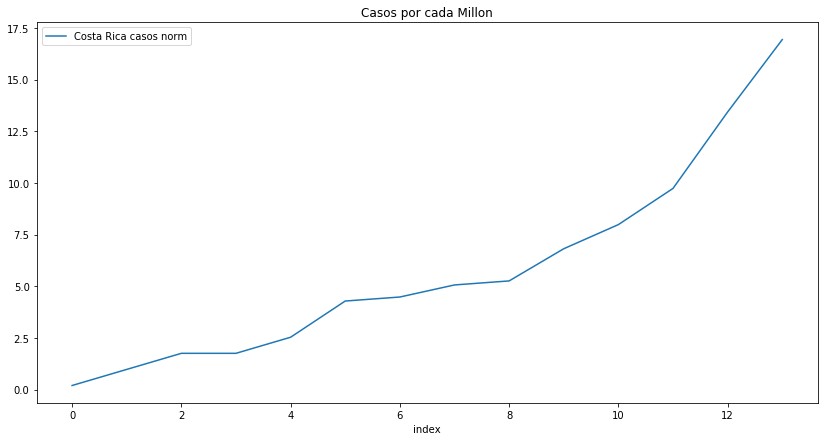

In [142]:
covid_19_multi_normalizado[[
    'index',
    #'Italia casos norm',
    'Costa Rica casos norm',
    #'España casos norm',
    #'China casos norm',
    #'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

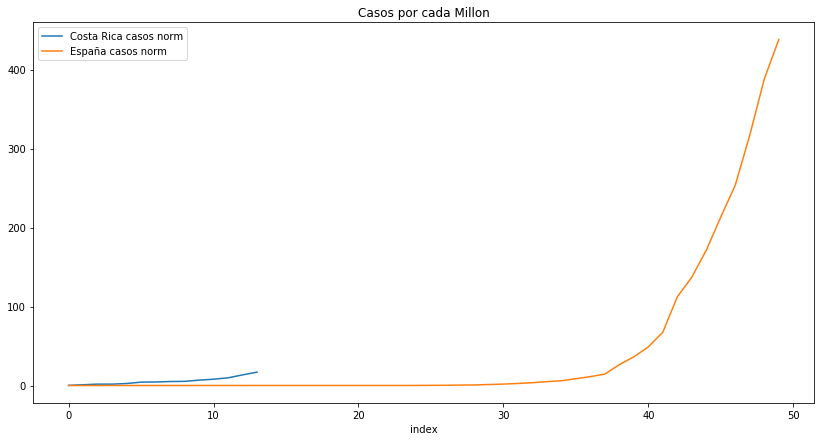

In [143]:
covid_19_multi_normalizado[[
    'index',
    #'Italia casos norm',
    'Costa Rica casos norm',
    'España casos norm',
    #'China casos norm',
    #'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

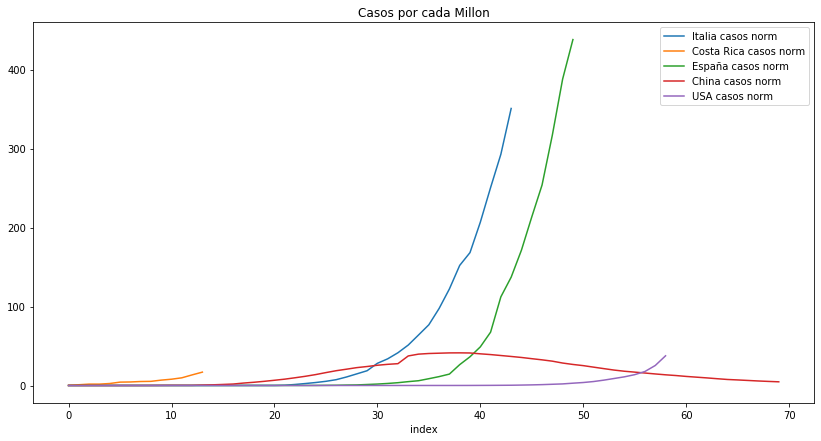

In [144]:
covid_19_multi_normalizado[[
    'index',
    'Italia casos norm',
    'Costa Rica casos norm',
    'España casos norm',
    'China casos norm',
    'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

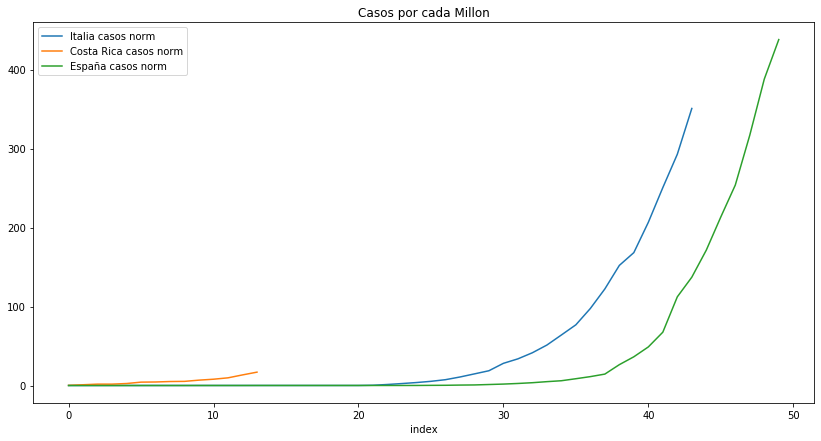

In [145]:
covid_19_multi_normalizado[[
    'index',
    'Italia casos norm',
    'Costa Rica casos norm',
    'España casos norm',
  #  'China casos norm',
  #  'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

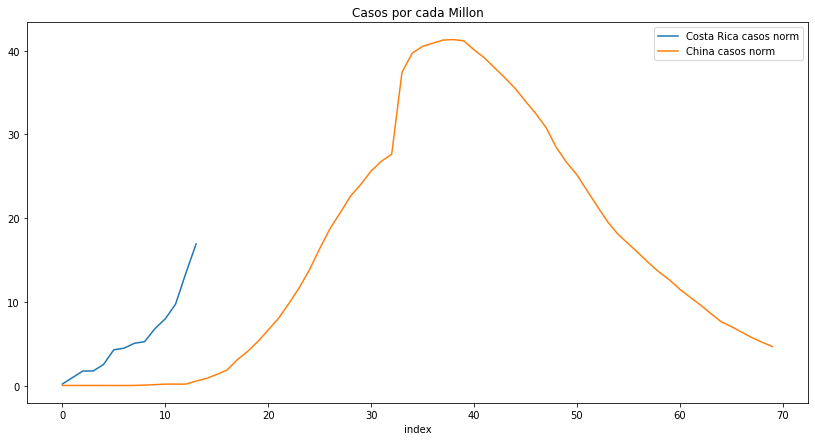

In [146]:
covid_19_multi_normalizado[[
    'index',
    #'Italia casos norm',
    'Costa Rica casos norm',
    #'España casos norm',
    'China casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

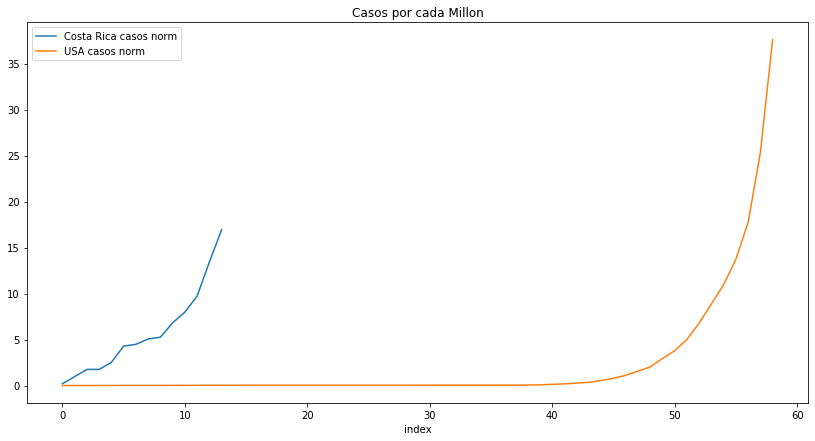

In [147]:
covid_19_multi_normalizado[[
    'index',
    #'Italia casos norm',
    'Costa Rica casos norm',
    #'España casos norm',
    'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

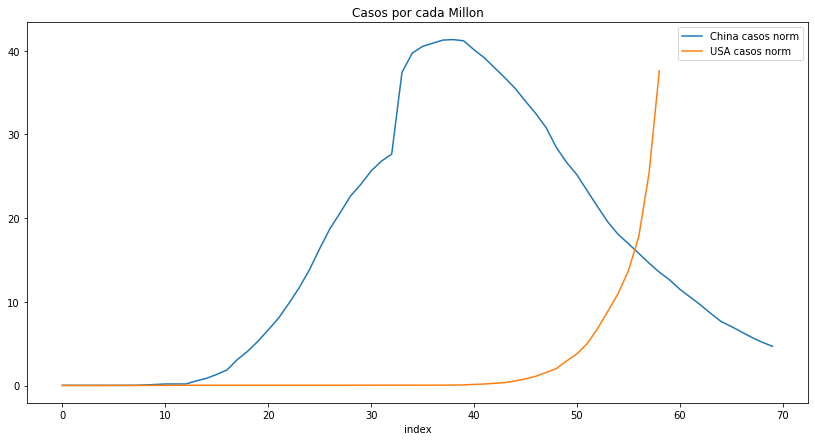

In [148]:
covid_19_multi_normalizado[[
    'index',
    #'Italia casos norm',
   # 'Costa Rica casos norm',
    #'España casos norm',
    'China casos norm',
    'USA casos norm'
]].set_index('index').plot(
    title='Casos por cada Millon',
    figsize=(14,7)
);

In [128]:
destination_file = 'covid-19_CostaRica.xlsx'
writer = pd.ExcelWriter(destination_file)
covid_19_multi_normalizado.to_excel(writer,'covid-19')
writer.save()